In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("spotify.csv")

In [12]:
data.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [13]:
data.drop("Index", axis =1, inplace = True)

In [14]:
data.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [15]:
data2 = data[["Beats Per Minute (BPM)", "Loudness (dB)", 
              "Liveness", "Valence", "Acousticness", 
              "Speechiness"]]

In [16]:
from sklearn.preprocessing import MinMaxScaler
for i in data.columns:
    MinMaxScaler(i)

In [17]:
from sklearn.cluster import KMeans

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\clust

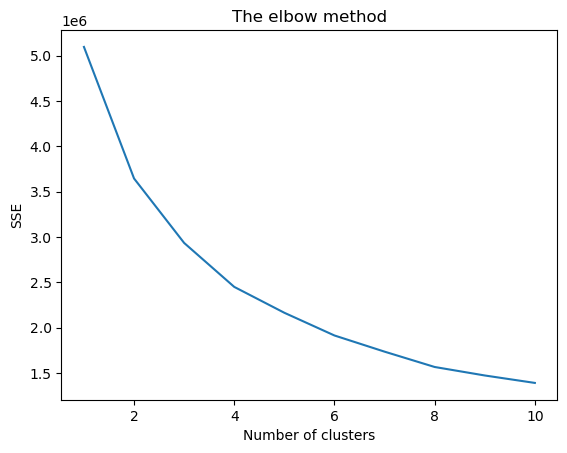

In [18]:
sse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(data2)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
km = KMeans(n_clusters=4, n_init=1)

In [25]:
cl = km.fit_predict(data2,)

In [26]:
cl

array([2, 3, 1, ..., 2, 2, 2])

In [27]:
data["clusters"] = cl

In [28]:
data["clusters"].unique()

array([2, 3, 1, 0])

In [29]:
df1 = data[data.clusters == 0]
df2 = data[data.clusters == 1]
df3 = data[data.clusters == 2]
df4 = data[data.clusters == 3]

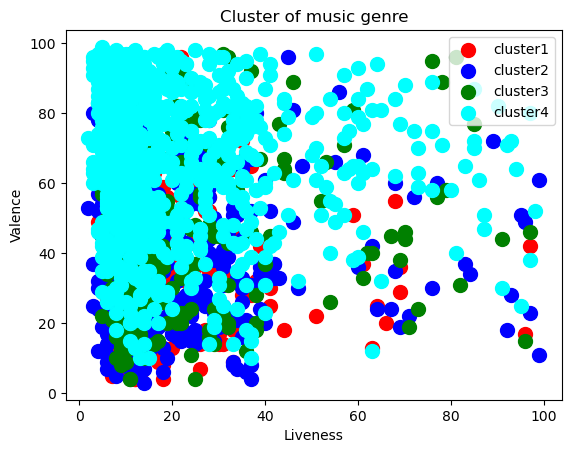

In [30]:
plt.scatter(df1["Liveness"], df1["Valence"], s = 100, c = "red", label="cluster1")
plt.scatter(df2["Liveness"], df2["Valence"], s = 100, c = "blue", label="cluster2")
plt.scatter(df3["Liveness"], df3["Valence"], s = 100, c = "green", label="cluster3")
plt.scatter(df4["Liveness"], df4["Valence"], s = 100, c = "cyan", label="cluster4")
plt.title("Cluster of music genre")
plt.xlabel("Liveness")
plt.ylabel("Valence")
plt.legend()
plt.show()